# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function: 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$.

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$


Apply your code to the optimization of a path among 

- <span style="color:blue">32 cities randomly placed **on** a circumference</span>
- <span style="color:blue">32 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path</span>

I followed precisely the suggestion to map the routes on 1D arrays. The relative distances between cities are calculted as the sites are randomly generated on a circle or inside a square, and used afterwards to compute the weight associated to each route. 

The main element of my programme is a **Chromosome**, a class containing a sequence of indexes, corresponding to the route across the relative cities, and a weight given by the sum of the distances between adjacent cities. The class contains the methods for random mutations:
- Single swap between two random cities in the route $\left[ 1, 2, 3, 4, 5, 6, 7 \right] \to \left[ 1, 2, 4, 3, 5, 6, 7 \right]$
- Swap between a random number of adjacent cities $\left[ 1, 2, 3, 4, 5, 6, 7 \right] \to \left[ 1, 2, 5, 6, 3, 4, 7 \right]$
- Inversion of the route between two random indexes  $\left[ 1, 2, 3, 4, 5, 6, 7 \right] \to \left[ 1, 2, 3, 6, 5, 4, 7 \right]$

These mutations are exectuted randomly before the next generation is created, in order to introduce more change dynamics in the population. A check function is introduced so that we can be sure that the requirements are always valid on all routes even after the mutation. 
If the mutation is an improvement there are high chances it would propagate to the following generations, otherwise the effects are damped right away in the following generations.

All routes are stored in a class **Population**, which contains the methods to generate a new generation. Two routes are chosen randomly at a time, following a non-uniform probability distribution which favours *fitter* routes. Before every new generation, the routes are sorted based on their length, then couples are chosen by generating a random index as  $N_{routes}\cdot x^3, x \in [0,1)$, in order to favour shorter routes. The two parents generate two children by exchanging portion of their routes. After 200 generations, the best route is chosen as example.

The mutations influence the fitness of the routes differently: in order to determine the optimal influence, I tried different combinations of acceptance probabilities for the different mutations in order to find the optimal combination.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

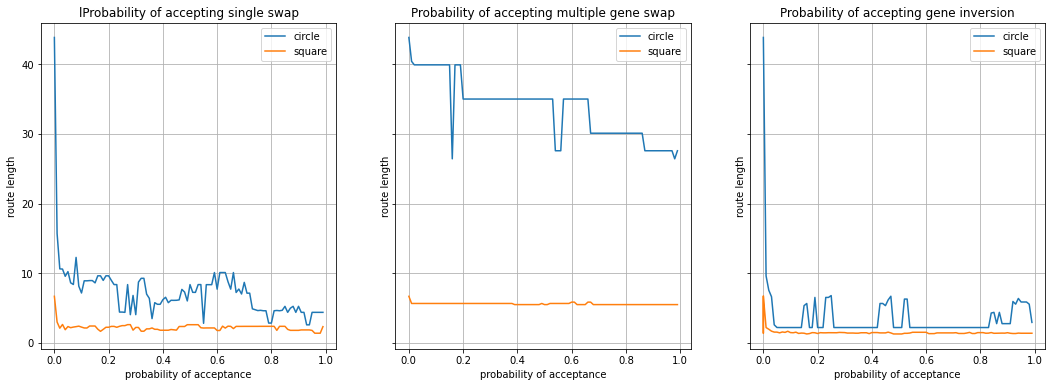

In [3]:
#views which parameters influences more the fitness
fig, axs = plt.subplots(1,3, figsize=[18,6],sharey=True)

#single swap mutation for pm=o and pi=0
x_s_c, y_s_c = np.loadtxt("9_1_data/s_params_compare_c.txt", usecols =(0,3), unpack=True)
axs[0].plot(x_s_c,y_s_c, label='circle')
x_s_s, y_s_s = np.loadtxt("9_1_data/s_params_compare_s.txt", usecols =(0,3), unpack=True)
axs[0].plot(x_s_s,y_s_s, label="square")
axs[0].set_xlabel("probability of acceptance")
axs[0].set_ylabel("route length")
axs[0].set_title("lProbability of accepting single swap")
axs[0].legend()
axs[0].grid(True)

#multiple gene swap mutation for ps=o and pi=0
x_p_c, y_p_c = np.loadtxt("9_1_data/p_params_compare_c.txt", usecols =(1,3), unpack=True)
axs[1].plot(x_p_c,y_p_c, label='circle')
x_p_s, y_p_s = np.loadtxt("9_1_data/p_params_compare_s.txt", usecols =(1,3), unpack=True)
axs[1].plot(x_p_s,y_p_s, label="square")
axs[1].set_xlabel("probability of acceptance")
axs[1].set_ylabel("route length")
axs[1].set_title("Probability of accepting multiple gene swap")
axs[1].legend()
axs[1].grid(True)

#inversion mutation for pm=o and ps=0
x_i_c, y_i_c = np.loadtxt("9_1_data/i_params_compare_c.txt", usecols =(2,3), unpack=True)
axs[2].plot(x_i_c,y_i_c, label='circle')
x_i_s, y_i_s = np.loadtxt("9_1_data/i_params_compare_s.txt", usecols =(2,3), unpack=True)
axs[2].plot(x_i_s,y_i_s, label="square")
axs[2].set_xlabel("probability of acceptance")
axs[2].set_ylabel("route length")
axs[2].set_title("Probability of accepting gene inversion")
axs[2].legend()
axs[2].grid(True)
plt.show()

I first tried with one mutation at the time to see which would influence more the fitness of the final result. As we can see, there is no clear winner but a clear looser, both for the circle and for the square: the multiple swap does help the general fitness, but not as much as the other two. So I fixed $p_{multiple} = 0.1$ and tried different combinations for the other two acceptance probabilities.

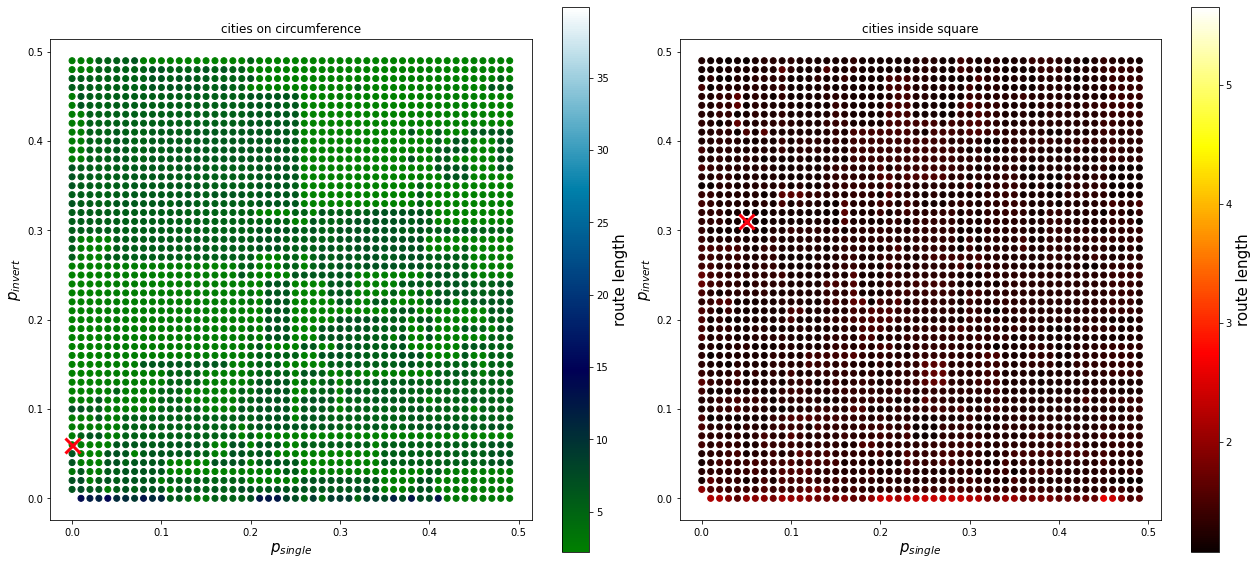

Minimum values for circle are:
	
	 probability of single swap = 0.0
	 probability of inversion = 0.06
Minimum values for circle are:
	
	 probability of single swap = 0.05
	 probability of inversion = 0.31


In [32]:
fig = plt.figure(figsize=[18,8])
# find minimum length for circle
data = np.loadtxt("data_9_1/params_compare_c.txt", usecols=(0,2,3),unpack = 'true')
L_min = np.min(data[2])
min_index = np.argmin(data[2])
s_min = data[0][min_index]
i_min = data[1][min_index]

# plot
ax = fig.add_subplot(121)
pc = ax.scatter( data[0], data[1],  c=data[2], marker="o", cmap="ocean")
ax.plot( s_min, i_min,  marker="x", color="xkcd:bright red", markersize=15, markeredgewidth=3)
cb = fig.colorbar(pc)
cb.set_label(label=r"route length", size=15)

ax.set_xlabel(r"$p_{single}$", size=15)
ax.set_ylabel(r"$p_{invert}$", size=15)
ax.set_aspect("equal")
ax.set_title("cities on circumference")

plt.tight_layout()

# find minimum length for square
data = np.loadtxt("data_9_1/params_compare_s.txt", usecols=(0,2,3),unpack = 'true')
L_min = np.min(data[2])
min_index = np.argmin(data[2])
s_min_s = data[0][min_index]
i_min_s = data[1][min_index]

# plot
ax = fig.add_subplot(122)
pc = ax.scatter( data[0], data[1],  c=data[2], marker="o", cmap="hot")
ax.plot( s_min_s, i_min_s,  marker="x", color="xkcd:bright red", markersize=15, markeredgewidth=3)
cb = fig.colorbar(pc)
cb.set_label(label=r"route length", size=15)

ax.set_xlabel(r"$p_{single}$", size=15)
ax.set_ylabel(r"$p_{invert}$", size=15)
ax.set_aspect("equal")
ax.set_title("cities inside square")

plt.tight_layout()
plt.show()

# print minimum values
print("Minimum values for circle are:\n\t" + "\n\t probability of single swap = " + str(s_min) + "\n\t probability of inversion = " + str(i_min))
# print minimum values
print("Minimum values for circle are:\n\t" + "\n\t probability of single swap = " + str(s_min_s) + "\n\t probability of inversion = " + str(i_min_s))



plt.show()

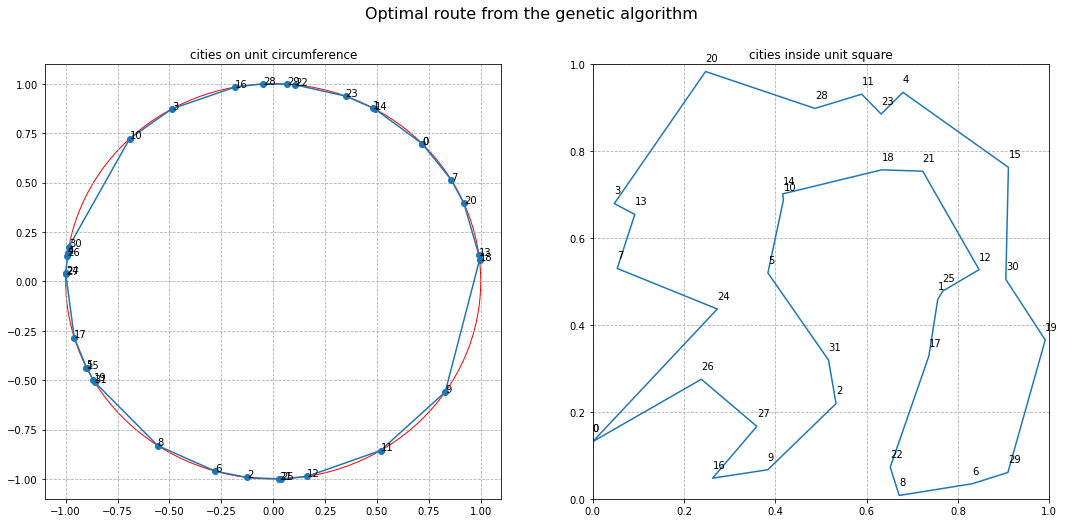

In [36]:
fig,ax = plt.subplots(1, 2, figsize=[18,8])
fig.suptitle('Optimal route from the genetic algorithm', fontsize=16)
cities_ind = np.loadtxt("data_9_1/city_coordinates_circle.txt", usecols=(0), dtype = int, unpack = True)
cities_coord = np.loadtxt("data_9_1/city_coordinates_circle.txt", usecols=(1,2), unpack = True)
best_sequence = np.loadtxt("data_9_1/best_route_circle.txt", dtype=int, unpack=True)
best_sequence=np.append(best_sequence,best_sequence[0])

ax[0].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'o-')
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
ax[0].add_patch(circle1)

for i,txt in enumerate(best_sequence):
    ax[0].annotate(txt, (cities_coord[0][txt], cities_coord[1][txt]))

ax[0].grid(linestyle='--')
ax[0].set_title("cities on unit circumference")
cities_ind_1 = np.loadtxt("data_9_1/city_coordinates_square.txt", usecols=(0), dtype = int, unpack = True)
cities_coord_1 = np.loadtxt("data_9_1/city_coordinates_square.txt", usecols=(1,2), unpack = True)
best_sequence_1 = np.loadtxt("data_9_1/best_route_square.txt", dtype=int, unpack=True)
best_sequence_1=np.append(best_sequence_1,best_sequence_1[0])


ax[1].plot(cities_coord_1[0][best_sequence_1],cities_coord_1[1][best_sequence_1])

for i,txt in enumerate (best_sequence_1):
    ax[1].annotate(txt, (cities_coord_1[0][txt], cities_coord_1[1][txt]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 #ha='left')
                )
    
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])
ax[1].grid(linestyle='--')
ax[1].set_title("cities inside unit square")
plt.show()

After having chosen the optimal parameters, we actually try to find the correct route. The cities are labelled based on the order they are randomly generated with. For the circle it is quite easy to check that the code is working properly: the best route simply connects adjacent cities on the circle. For the square this is a little harder, since there is a very high degeneracy of possible routes. What is shown might very well be a local minimum instead of the best possible route. However, the objective of this type of simulation is not to determine necessarily **the** solution of the problem, but to find an adequate answer to a practical problem, without having to brute force every possible calculation. 

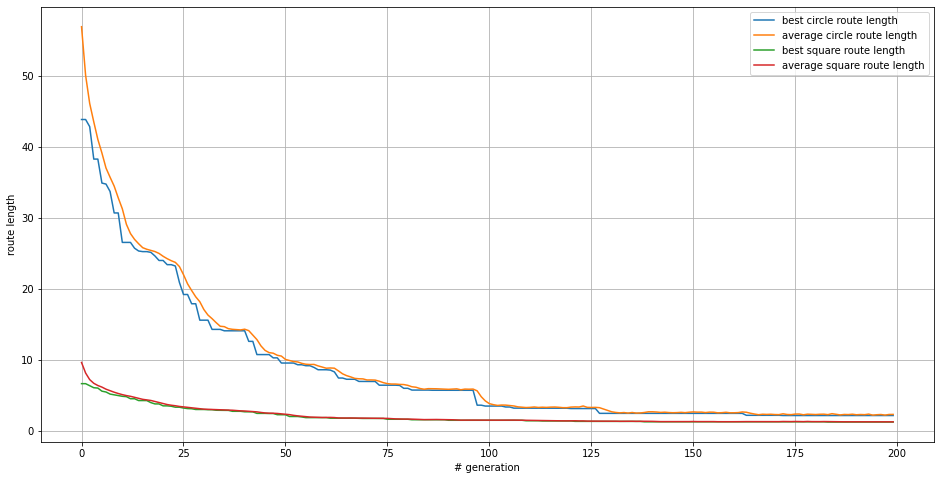

In [37]:
fig = plt.figure(figsize=[16,8])
fitness = np.loadtxt("data_9_1/fitness_comparison_circle.txt", unpack=True)

plt.plot(fitness[0], fitness[1], label = 'best circle route length')
plt.plot(fitness[0], fitness[2], label = 'average circle route length')

fitness = np.loadtxt("data_9_1/fitness_comparison_square.txt", unpack=True)

plt.plot(fitness[0], fitness[1], label = 'best square route length')
plt.plot(fitness[0], fitness[2], label = 'average square route length')

plt.xlabel('# generation')
plt.ylabel('route length')

plt.legend()
plt.grid(True)
plt.show()

This final graph compares the fitness of the routes with the passing of the generations: as we can see, on the circle there is a massive improvement at first, which gradually slows down. A similar behaviour is taken by the route inside the square, simply not on the same scale (since routes already tend to be shorter). After about 100 generations, apart from the occasional jump introduced by some mutation, there is no general decrease in route length: the population tends to be inhabited by very similar chromosomes, so every cross-over risks to simply make new copies of the same old routes. If the fitness reaches a local minimum, there is no way for the population to radically improve unless of a sporadic improvement imposed from the outside. 

As we already noticed, it is not the main intention of the genetic algorithm; however, it could be of interest to improve beyond this limit: to do this, it will be necessary to add new methods of sharing possible improvements.